In [88]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [89]:
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [90]:
def split(filehandler, delimiter=';', row_limit=3500,
          output_name_template='wine%s.csv', output_path='.', keep_headers=True):
    import csv
    reader = csv.reader(filehandler, delimiter=delimiter)
    current_piece = 1
    current_out_path = os.path.join(
        output_path,
        output_name_template % current_piece
    )
    current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
    current_limit = row_limit
    if keep_headers:
        headers = next(reader)
        current_out_writer.writerow(headers)
    for i, row in enumerate(reader):
        if i + 1 > current_limit:
            current_piece += 1
            current_limit = row_limit * current_piece
            current_out_path = os.path.join(
                output_path,
                output_name_template % current_piece
            )
            current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
            if keep_headers:
                current_out_writer.writerow(headers)
        current_out_writer.writerow(row)

In [91]:
split(open('C:\\Users\\Albriht\\Desktop\\winequality-white.csv', 'r'));

In [92]:
os.rename('C:\\Users\\Albriht\\Desktop\\winequality-white1.csv', 'C:\\Users\\Albriht\\Desktop\\winequality-white_Train.csv')
os.rename('C:\\Users\\Albriht\\Desktop\\winequality-white2.csv', 'C:\\Users\\Albriht\\Desktop\\winequality-white_Test.csv')

In [93]:
# Обучающая выборка:
train = pd.read_csv('C:\\Users\\Albriht\\Desktop\\winequality-white_Train.csv', sep=",")
# Тестовая выборка:
test = pd.read_csv('C:\\Users\\Albriht\\Desktop\\winequality-white_Test.csv', sep=",")

In [94]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [95]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
train.shape, test.shape

((4898, 12), (4898, 12))

In [97]:
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [98]:
test.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [99]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [100]:
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
train['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

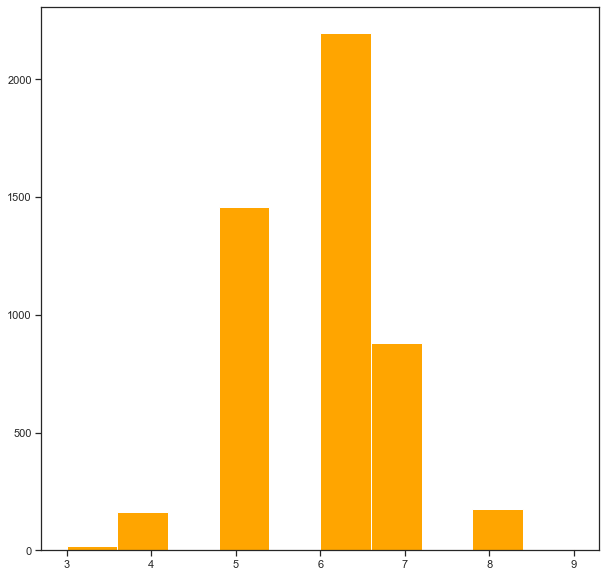

In [102]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(train['quality'], color="orange")
plt.show()

E:\GamesCenter\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

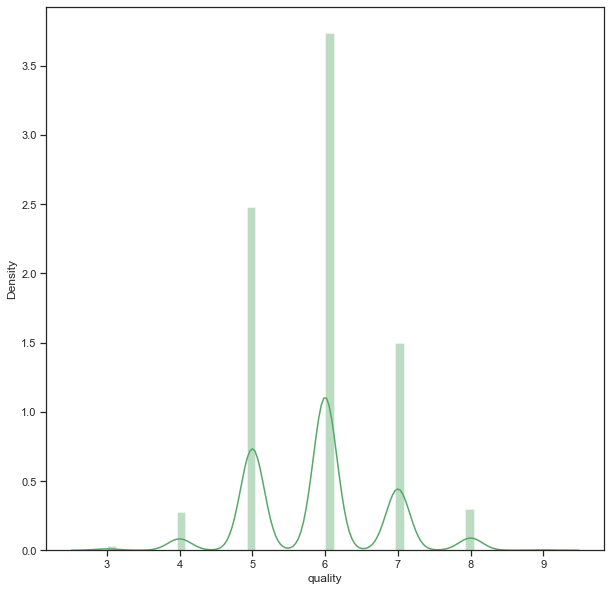

In [103]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(train['quality'], color="g")

In [104]:
#посчитаем дисбаланс классов
total = train.shape[0]
class_6, class_5, class_7, class_8, class_4, class_3, class_9 = train['quality'].value_counts()
print('Класс 3 составляет {}%, \nкласс 4 составляет {}%, \nкласс 5 составляет {}%, \nкласс 6 составляет {}%, \nкласс 7 составляет {}%, \nкласс 8 составляет {}%, \nкласс 9 составляет {}%.'
      .format(round(class_3 / total, 4)*100, 
              round(class_4 / total, 4)*100,
              round(class_5 / total, 4)*100,
              round(class_6 / total, 4)*100,
              round(class_7 / total, 4)*100,
              round(class_8 / total, 4)*100,
              round(class_9 / total, 4)*100))

Класс 3 составляет 0.41000000000000003%, 
класс 4 составляет 3.3300000000000005%, 
класс 5 составляет 29.75%, 
класс 6 составляет 44.879999999999995%, 
класс 7 составляет 17.97%, 
класс 8 составляет 3.5700000000000003%, 
класс 9 составляет 0.1%.


In [66]:
train[''].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [105]:
#посчитаем дисбаланс классов для тестовой выборки 
total = train.shape[0]
class_6, class_5, class_7, class_8, class_4, class_3, class_9 = train['quality'].value_counts()
print('Класс 3 составляет {}%, \nкласс 4 составляет {}%, \nкласс 5 составляет {}%, \nкласс 6 составляет {}%, \nкласс 7 составляет {}%, \nкласс 8 составляет {}%, \nкласс 9 составляет {}%.'
      .format(round(class_3 / total, 4)*100, 
              round(class_4 / total, 4)*100,
              round(class_5 / total, 4)*100,
              round(class_6 / total, 4)*100,
              round(class_7 / total, 4)*100,
              round(class_8 / total, 4)*100,
              round(class_9 / total, 4)*100))

Класс 3 составляет 0.41000000000000003%, 
класс 4 составляет 3.3300000000000005%, 
класс 5 составляет 29.75%, 
класс 6 составляет 44.879999999999995%, 
класс 7 составляет 17.97%, 
класс 8 составляет 3.5700000000000003%, 
класс 9 составляет 0.1%.


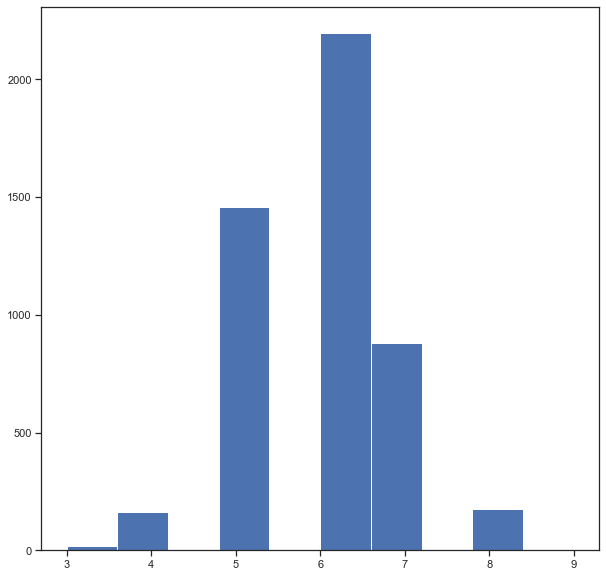

In [108]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(test['quality'], color="b")
plt.show()

E:\GamesCenter\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

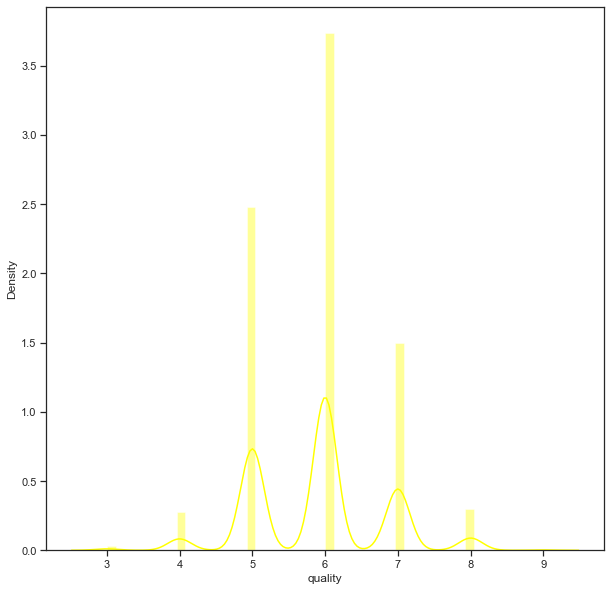

In [109]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(test['quality'], color="yellow")

In [110]:
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [111]:
train['dataset'] = 'TRAIN'
test['dataset'] = 'TEST'

In [112]:
#Колонки для объединения
join_cols = ['dataset', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [113]:
data_all = pd.concat([train[join_cols], test[join_cols]])

In [114]:
assert data_all.shape[0] == train.shape[0]+test.shape[0]

In [115]:
data_all.head()

,dataset,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,TRAIN,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,TRAIN,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,TRAIN,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,TRAIN,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,TRAIN,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [118]:
# Числовые колонки для масштабирования
scale_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [119]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [120]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [121]:
data_all.head()

,dataset,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,volatile acidity_scaled,citric acid_scaled,residual sugar_scaled,chlorides_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,density_scaled,pH_scaled,sulphates_scaled,alcohol_scaled
0,TRAIN,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,...,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,TRAIN,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,...,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,TRAIN,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,...,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,TRAIN,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,...,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,TRAIN,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,...,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


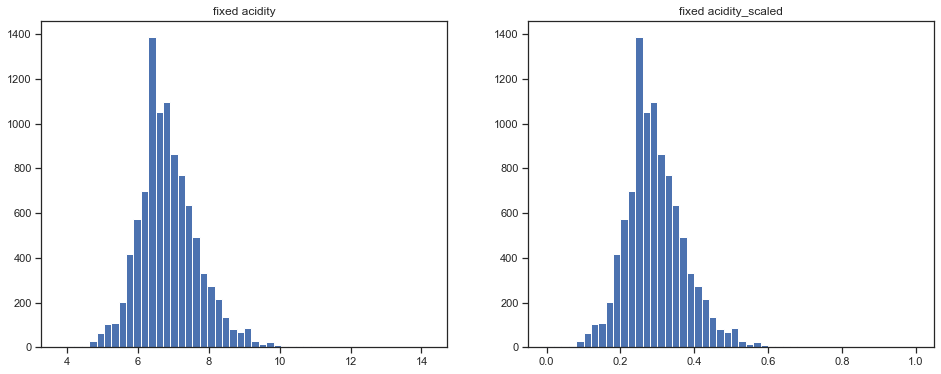

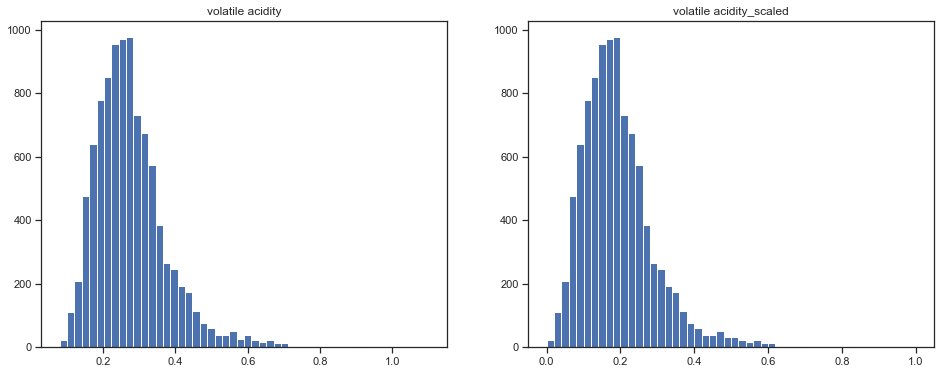

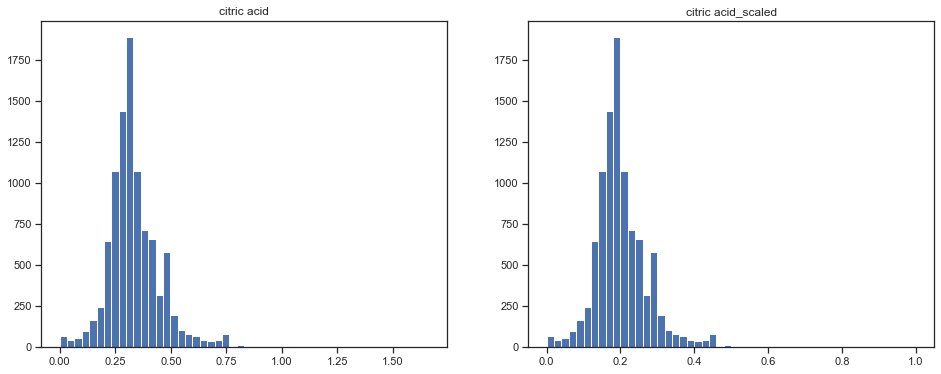

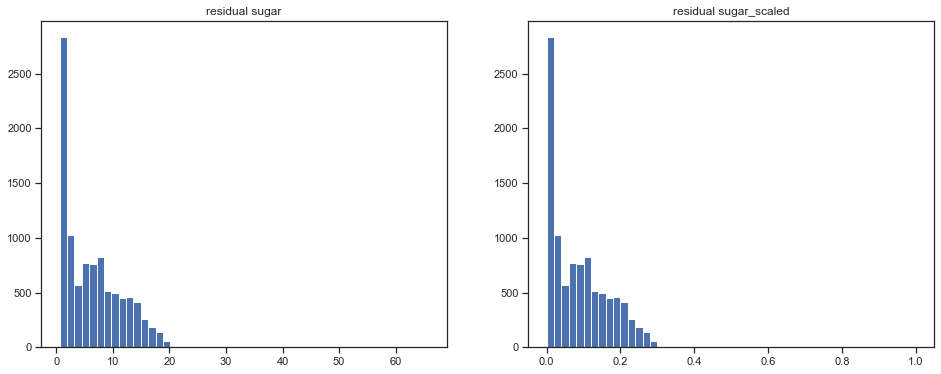

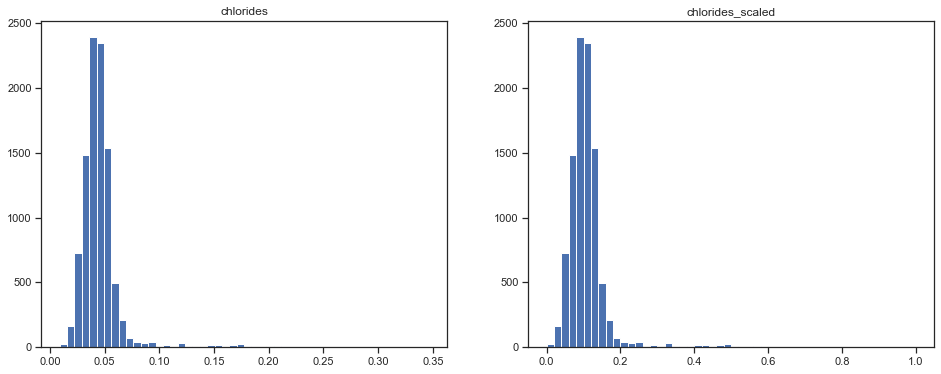

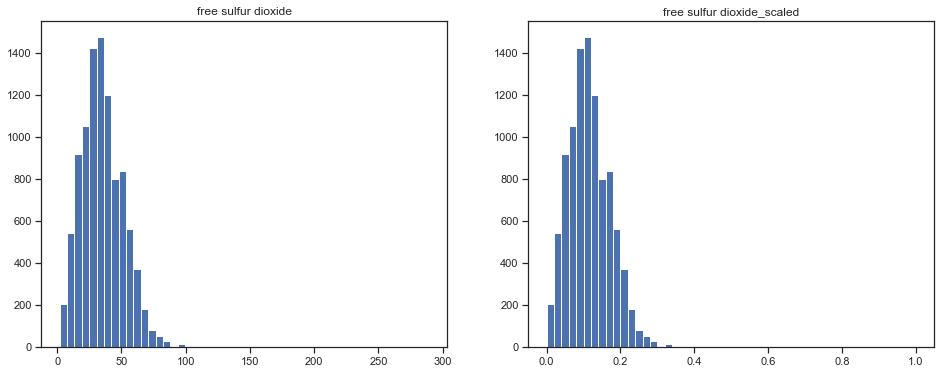

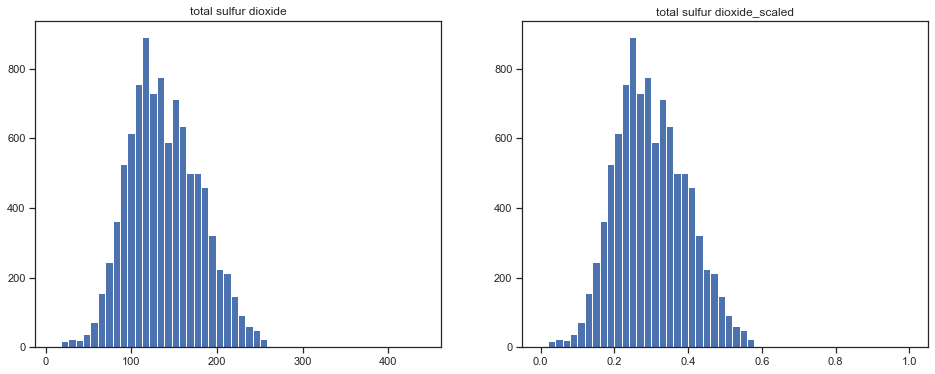

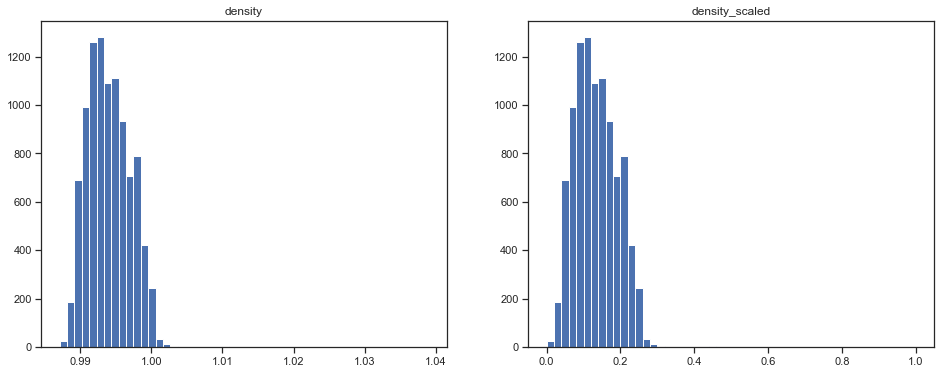

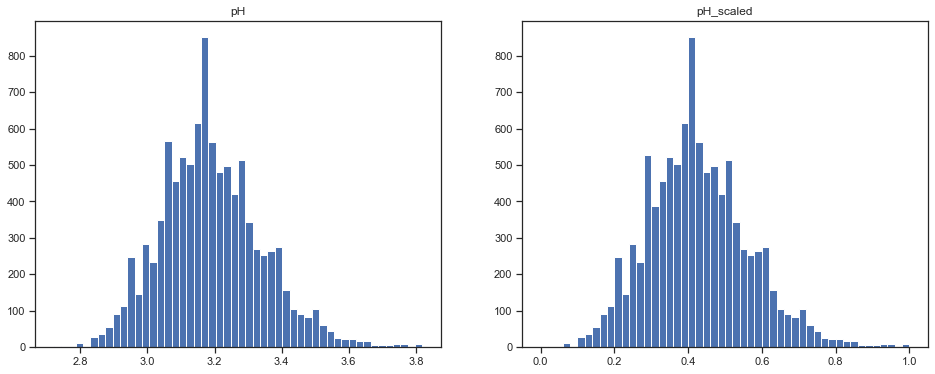

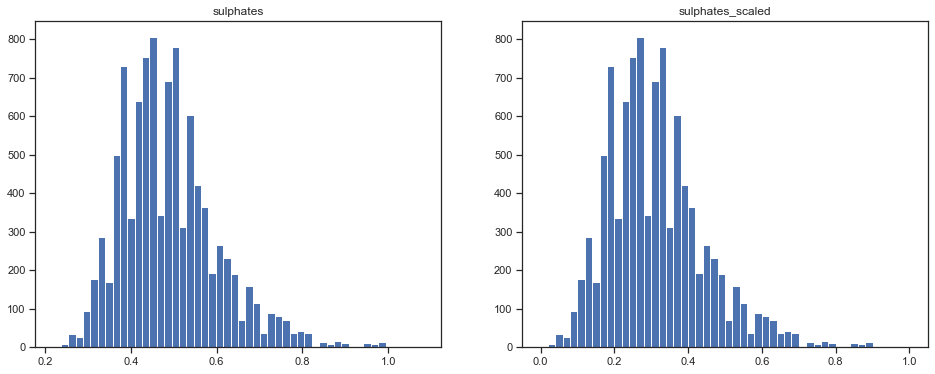

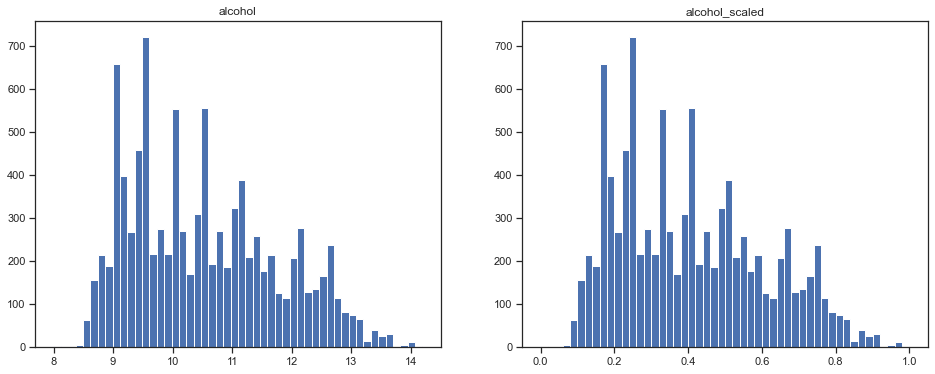

In [122]:
for col in scale_cols:
    col_scaled = col + '_scaled'
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [123]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['quality']
corr_cols_2

['fixed acidity_scaled',
 'volatile acidity_scaled',
 'citric acid_scaled',
 'residual sugar_scaled',
 'chlorides_scaled',
 'free sulfur dioxide_scaled',
 'total sulfur dioxide_scaled',
 'density_scaled',
 'pH_scaled',
 'sulphates_scaled',
 'alcohol_scaled',
 'quality']

<AxesSubplot:>

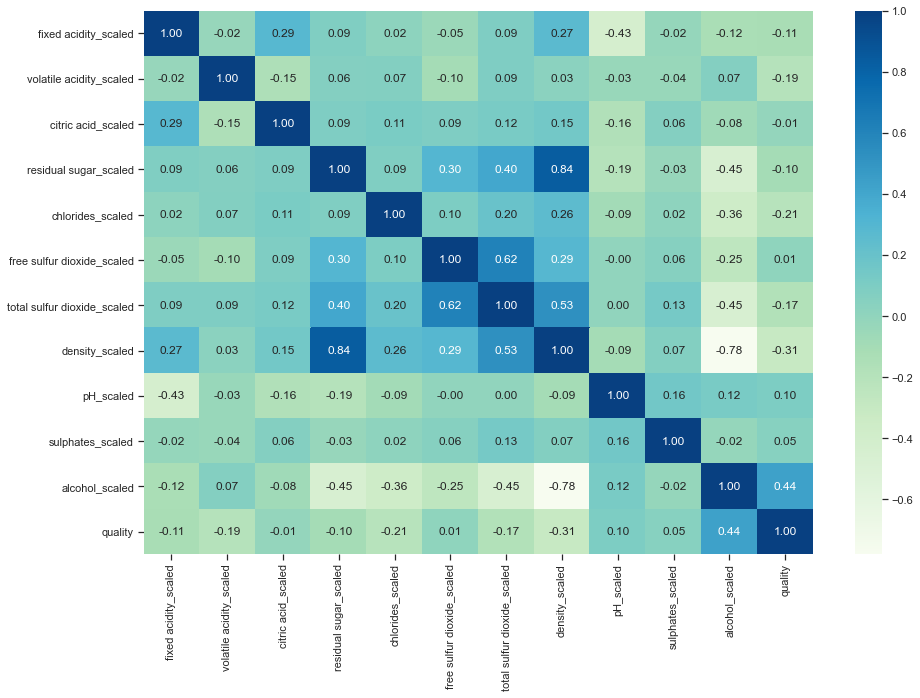

In [124]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f', cmap="GnBu")

In [125]:
qual = pd.concat([train['quality'], test['quality']])

In [126]:
def code_myohe(data, column):
    for i in data[column].unique():
        data[column + '=' + str(i)] = (data[column] == i).astype(int)

In [127]:
code_myohe(data_all, 'quality')
data_all.head()

,dataset,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,pH_scaled,sulphates_scaled,alcohol_scaled,quality=6,quality=5,quality=7,quality=8,quality=4,quality=3,quality=9
0,TRAIN,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,...,0.254545,0.267442,0.129032,1,0,0,0,0,0,0
1,TRAIN,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,...,0.527273,0.313953,0.241935,1,0,0,0,0,0,0
2,TRAIN,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,...,0.490909,0.255814,0.338710,1,0,0,0,0,0,0
3,TRAIN,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,...,0.427273,0.209302,0.306452,1,0,0,0,0,0,0
4,TRAIN,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,...,0.427273,0.209302,0.306452,1,0,0,0,0,0,0


In [128]:
data_all['quality'] = qual

In [129]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='blue')
        plt.show()

In [130]:
train_data_all = data_all[data_all['dataset']=='TRAIN']
test_data_all = data_all[data_all['dataset']=='TEST']
train_data_all.shape, test_data_all.shape

((4898, 31), (4898, 31))

In [131]:
# Признаки для задачи классификации
task_clas_cols = ['fixed acidity_scaled', 'volatile acidity_scaled', 'citric acid_scaled', 'residual sugar_scaled',
       'chlorides_scaled', 'total sulfur dioxide_scaled',
       'pH_scaled', 'sulphates_scaled', 'alcohol_scaled']

In [150]:
# Выборки для задачи классификации
clas_X_train = train_data_all[task_clas_cols]
clas_X_test = test_data_all[task_clas_cols]

clas_Y6_train = train_data_all['quality=6']
clas_Y6_test = test_data_all['quality=6']

clas_Y7_train = train_data_all['quality=7']
clas_Y7_test = test_data_all['quality=7']

clas_X_train.shape, clas_X_test.shape, clas_Y6_train.shape, clas_Y6_test.shape

((4898, 9), (4898, 9), (4898,), (4898,))

In [151]:
clas_models = { 'KNN_5':KNeighborsClassifier(n_neighbors=5)}

In [152]:
clasMetricLogger = MetricLogger()

In [153]:
def clas_train_model7(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y7_train)
    Y_pred = model.predict(clas_X_test)
    precision = precision_score(clas_Y7_test.values, Y_pred)
    recall = recall_score(clas_Y7_test.values, Y_pred)
    f1 = f1_score(clas_Y7_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y7_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(clas_Y7_test.values, Y_pred)
    
    plot_confusion_matrix(model, clas_X_test, clas_Y7_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
KNeighborsClassifier()
*****************************************************


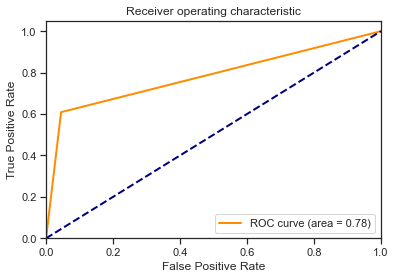

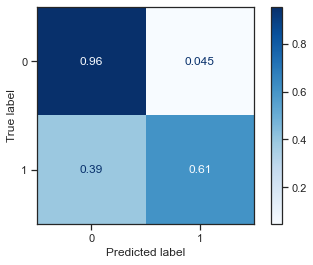

In [165]:
for model_name, model in clas_models.items():
    clas_train_model7(model_name, model, clasMetricLogger)

In [155]:
clas_X_train.shape

(4898, 9)

In [156]:
n_range = np.array(range(1,170,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
          40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
          79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
         118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154,
         157, 160, 163, 166, 169])}]

In [157]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=6, scoring='roc_auc')
clf_gs.fit(clas_X_train, clas_Y7_train)

Wall time: 37.5 s


GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
        40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
        79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
       118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154,
       157, 160, 163, 166, 169])}],
             scoring='roc_auc')

In [158]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=169)

In [159]:
clf_gs.best_params_

{'n_neighbors': 169}

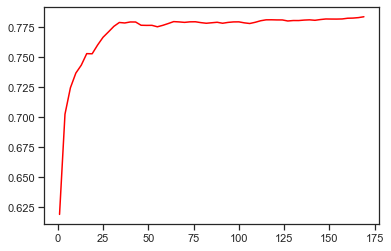

In [160]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'], color="red")

In [161]:
clas_models_grid = {'KNN_160':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(n_neighbors=169)
*****************************************************


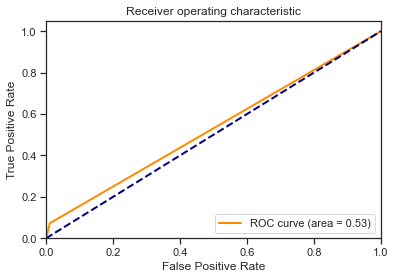

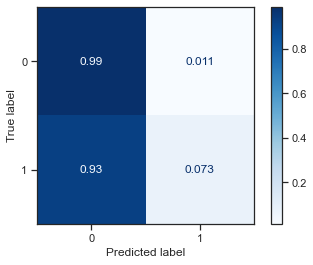

In [162]:
for model_name, model in clas_models_grid.items():
    clas_train_model7(model_name, model, clasMetricLogger)

In [163]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

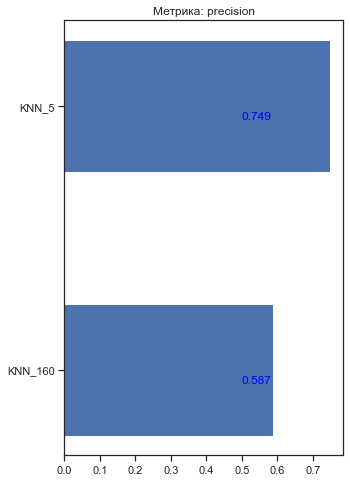

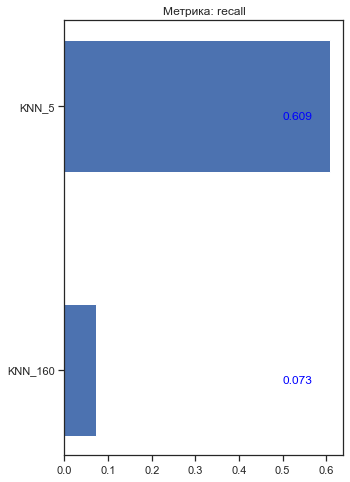

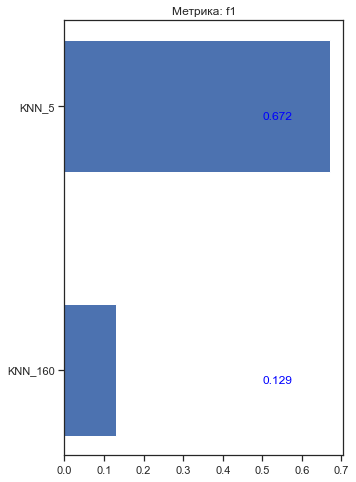

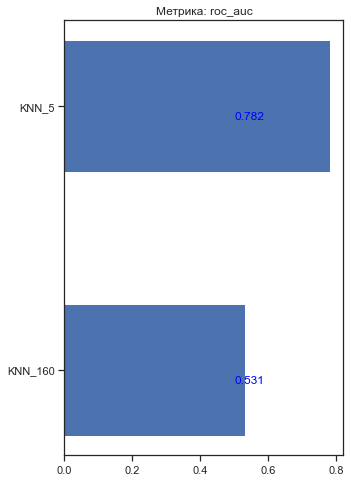

In [164]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(5, 8))